In [1]:
import numpy as np
import pandas as pd
from utils import LDA
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN

## **Loading the Data**

The IRIS dataset is loaded from the `sklearn.datasets` package as a pandas dataframe. To verify if the data is loaded correctly, check the first five rows (head) of the dataframe.
If this step fails, the loading of the data is incorrect.

In [2]:
# Load the data
data: dict[str, np.ndarray] = datasets.load_iris()
df: pd.DataFrame = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### **Preprocessing the Data**

The data is preprocessed to remove the unwanted columns and null values.

In [3]:
# Drop the Unnamed id column and nan rows
df.dropna(inplace=True)

In [4]:
# Normalize the data
outcome = df["target"]
df.drop("target", axis=1, inplace=True)
df = (df - df.min()) / (df.max() - df.min())
df["target"] = outcome
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


### **Data Analysis**

The data is plotted on graphs to find our patterns and relationships among the features.

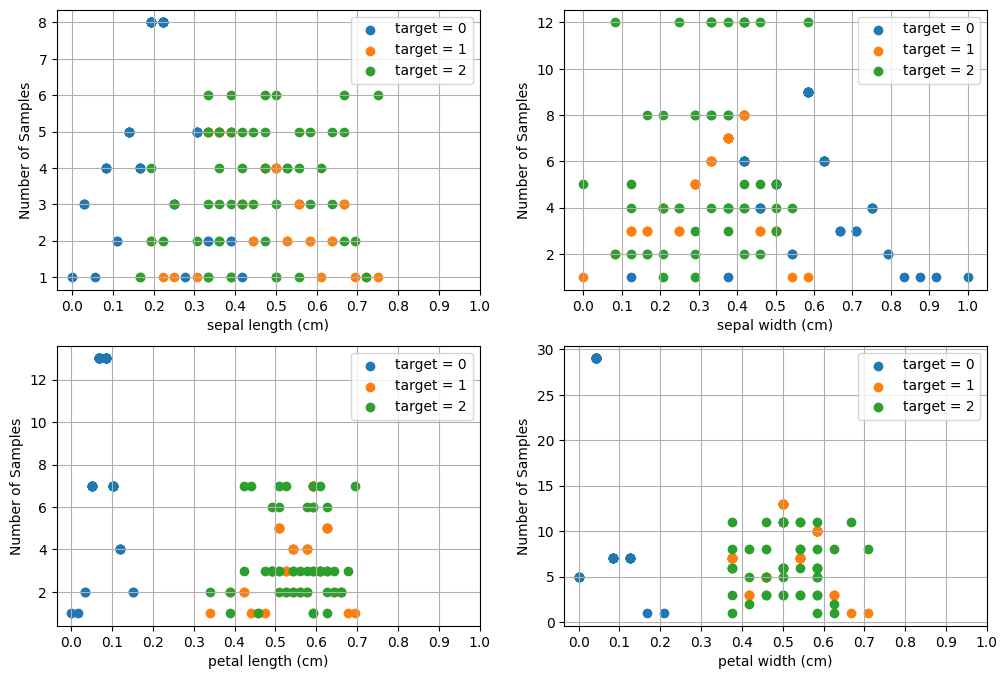

In [5]:
plot = plt.figure(figsize=(12, 8))

for i, col in enumerate(df.columns, start=1):
    if col == "target":
        continue
    else:
        plt.subplot(2, 2, i)

    col0 = list(df[df["target"] == 0][col])
    col1 = list(df[df["target"] == 1][col])
    col2 = list(df[df["target"] == 2][col])
    plt.scatter(col0, [col0.count(i) for i in col0], label="target = 0")
    plt.scatter(col1, [col1.count(i) for i in col1], label="target = 1")
    plt.scatter(col1, [col2.count(i) for i in col2], label="target = 2")
    plt.xlabel(col)

    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.ylabel("Number of Samples")
    plt.grid(True)
    plt.legend()

plt.show()

## **Train-Test Split**

Since the test set is not provided, the training set is split into test sets using a randomized 80-20 split.

In [6]:
# Shuffle the data
train_size: int = int(0.8 * df.shape[0])
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into training and testing
x_train: np.ndarray = df.iloc[:train_size, :-1].values
y_train: np.ndarray = df.iloc[:train_size, -1].values
x_test: np.ndarray = df.iloc[train_size:, :-1].values
y_test: np.ndarray = df.iloc[train_size:, -1].values

### **Perform $k$-Nearest Neighbours**

Having preprocessed and analysed the data, we now perform the $k$-NN algorithm on the original data to get predictions on the test data using $k = 5$.

The accuracy of the model is also calculated.

In [7]:
# Train the model
knn = KNN(n_neighbors=5)
knn.fit(x_train, y_train)

# Check the accuracy
print(f"Accuracy: {knn.score(x_test, y_test) * 100}%")

Accuracy: 90.0%


### **Dimensionality Reduction using LDA**

A copy of the training and testing data is made and its dimensionality is reduced using `LDA` implemented in `utils.py`.

$k$-NN is used on the reduced data to get predictions on the test data using $k = 5$ and the accuracy of both the runs is compared.

In [8]:
# Fit the training data using LDA
trainer = LDA(x_train, y_train)
lda_train = trainer.transform()
print("Transformed Training Data using LDA")

# Fit the testing data using LDA
tester = LDA(x_test, y_test)
lda_test = tester.transform()
print("Transformed Testing Data using LDA")

Transformed Training Data using LDA
Transformed Testing Data using LDA


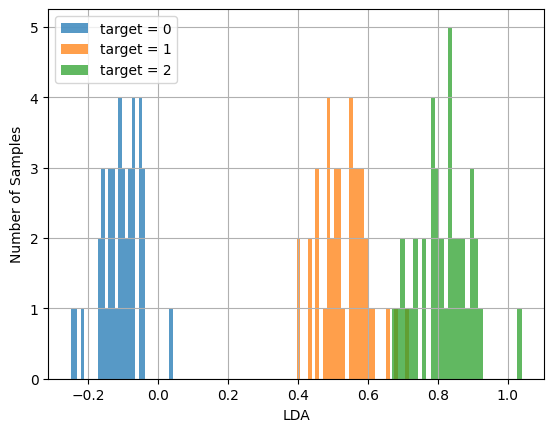

In [9]:
# Plot the data
plt.hist(lda_train[y_train == 0].real, label="target = 0", alpha=0.75, bins=30)
plt.hist(lda_train[y_train == 1].real, label="target = 1", alpha=0.75, bins=30)
plt.hist(lda_train[y_train == 2].real, label="target = 2", alpha=0.75, bins=30)
plt.xlabel("LDA")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.legend()
plt.show()

In [10]:
# Train the model for the data
lda_train = np.real(lda_train.reshape(-1, 1))
knn = KNN(n_neighbors=5)
knn.fit(lda_train, y_train)

# Calculate the accuracy
lda_test = np.real(lda_test.reshape(-1, 1))
print(f"Accuracy: {knn.score(lda_test, y_test) * 100}%")

Accuracy: 96.66666666666667%


## **Comparing the Results**

Over different runs, it was observed that the accuracy of the model was higher when the dimensionality was reduced using LDA. This is because the LDA algorithm tries to find the best linear combination of features that maximizes the separation between the classes. This is why the accuracy of the model is higher when the dimensionality is reduced using LDA.

However, the model is highly sensitive due to the small size of the dataset, and the accuracy of the model can vary drastically depending on the random split of the data into training and testing sets.